<a href="https://colab.research.google.com/gist/Codebmk/4f8ab0bd031552bf96b20e7adda33504/lstm-rnn-implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
from google.colab import files
upload_file = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv
Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [10]:
import io
dataset_train = pd.read_csv(io.BytesIO(upload_file['Google_Stock_Price_Train.csv']))
training_set = dataset_train.iloc[:, 1:2].values

training_set[0]

array([325.25])

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [16]:
X_train = []
y_train = []

for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [17]:
 from keras.models import Sequential
 from keras.layers import Dense
 from keras.layers import LSTM
 from keras.layers import Dropout

In [18]:
regressor = Sequential()

In [19]:
regressor.add(LSTM(units = 50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [20]:
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

In [21]:
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

In [22]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [23]:
regressor.add(Dense(units=1))

In [24]:
regressor.compile(optimizer="adam", loss="mean_squared_error")

In [25]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 16s 154ms/step - loss: 0.0356
Epoch 2/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 6s 170ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 6s 169ms/step - loss: 0.0058
Epoch 6/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 6s 170ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 9s 223ms/step - loss: 0.0039
Epoch 10/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 6s 172ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0048
Epoch 13/100

In [26]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [28]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


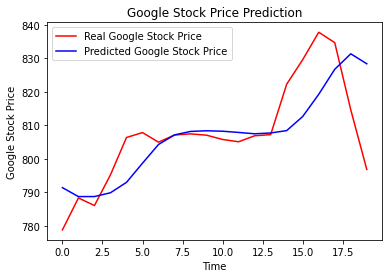

In [29]:
plt.plot(real_stock_price, color="red", label="Real Google Stock Price")
plt.plot(predicted_stock_price, color="blue", label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()